## Summary

Muons decay exponentially with a lifetime of $\tau = 2.2 \mu$s. We are planning an experiment which will measure 10,000 muon decays to extract the mean decay time (which should be $\tau$), and want to know whether there will be a bias introduced by a max measurement time of 10 seconds. i.e. muons will be produced with a lifetime which decays exponentially up to 10 microseconds. 

We will perform the experiment 500 times in simulation to obtain a bias and associated uncertainty. More runs would improve our knowledge further, but take time. 

In [22]:
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot

In [36]:
tau = 2.2 # lifetime in us
upper_lim = 10.

decay = lambda t : 1./tau * np.exp(-t/tau)  # Normalised decay PDF
above_cutoff = 1. - quad(decay, 0, upper_lim)[0]          # fraction of events above 10 us is integral from 10 - infinity
print("Fraction of events above {:d} microseconds: {:.3f}".format(int(upper_lim), above_cutoff))

def experiment(num_events = 10000, above_cutoff=above_cutoff, upper_lim=upper_lim):
    # For speediest generation use numpy, generate too many events and crop
    decay_times = np.array([])
    while decay_times.size < num_events:
        to_generate = int((num_events - decay_times.size) * (1. + above_cutoff) * 1.01)
        events = np.random.exponential(tau, size=to_generate)
        decay_times = np.append(decay_times, events[events <= upper_lim])
    decay_times = decay_times[:num_events] # Discard excess entries
    return(decay_times)

run = experiment()

Fraction of events above 10 microseconds: 0.011


Text(0, 0.5, 'Count')

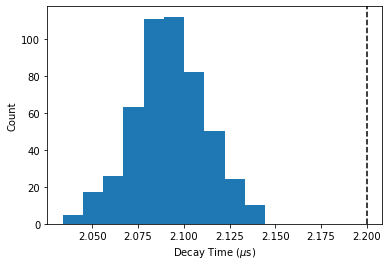

In [37]:
num_runs = 500
experiment_results = []
for run in range(num_runs):
    experiment_results.append(np.mean(experiment()))
    
pyplot.hist(experiment_results),
pyplot.axvline(x=tau, ls="--", color="k")
pyplot.xlabel(r"Decay Time ($\mu$s)")
pyplot.ylabel("Count")

In [38]:
bias = np.mean(experiment_results) - tau
error_on_one_run = np.std(experiment_results)
error_on_bias = np.std(experiment_results)/np.sqrt(len(experiment_results))

print("Bias is {:.4f} +/- {:.4f}".format(bias, error_on_bias))
print("Statistical error on single experiment is {:.3f}".format(error_on_one_run))

Bias is -0.1081 +/- 0.0009
Statistical error on single experiment is 0.020


Here we see that systematic error is much larger than statistical error. The systematic error occurs because we neglect measurements with a high decay time, we should use a higher cutoff than 10 microseconds if we want to make the best use of our equipment.

In [42]:
upper_lim = 20.
above_cutoff = 1. - quad(decay, 0, upper_lim)[0]          # fraction of events above 10 us is integral from 10 - infinity
print("Fraction of events above {:d} microseconds: {:.5f}".format(int(upper_lim), above_cutoff))

num_runs = 500
experiment_results = []
for run in range(num_runs):
    experiment_results.append(np.mean(experiment(upper_lim=upper_lim, above_cutoff=above_cutoff)))
    
pyplot.hist(experiment_results),
pyplot.axvline(x=tau, ls="--", color="k")
pyplot.xlabel(r"Decay Time ($\mu$s)")
pyplot.ylabel("Count")

bias = np.mean(experiment_results) - tau
error_on_one_run = np.std(experiment_results)
error_on_bias = np.std(experiment_results)/np.sqrt(len(experiment_results))

print("Bias is {:.4f} +/- {:.4f}".format(bias, error_on_bias))
print("Statistical error on single experiment is {:.3f}".format(error_on_one_run))

Fraction of events above 20 microseconds: 0.00011
Bias is -0.0032 +/- 0.0010
Statistical error on single experiment is 0.021


Here we still have a definite bias (approx 3 times the error on the bias, so it's real even though small), however it is now negligible compared to the statistical error on the experiment. If we want to improve further, we'd need to capture more decays.